# Partie 1 "Problem Solving"


## 1. Vacance et bagage
---

### Implementation
---
Cette implémentation utilise la méthode de programmation dynamique pour résoudre ce problème, qui est un exemple classique du problème du "sac à dos" (Knapsack Problem).

In [5]:
def take_objects(obj_importance:list[int], obj_sizes:list[int],car_space:int) -> list[int]:
  if(len(obj_importance)!=len(obj_sizes)):
    raise ValueError("obj_importance and obj_sizes must have the same length")
  n = len(obj_importance)
  dp = [[0 for _ in range(car_space+1)] for _ in range(n+1)]
  # Remplir le tableau dp
  for i in range(1, n + 1):
      for w in range(car_space + 1):
          if obj_sizes[i-1] <= w:
              dp[i][w] = max(dp[i-1][w], dp[i-1][w - obj_sizes[i-1]] + obj_importance[i-1])
          else:
              dp[i][w] = dp[i-1][w]

  # Retrouver les objets pris
  w = car_space
  taken_objects = []
  for i in range(n, 0, -1):
      if dp[i][w] != dp[i-1][w]:
          taken_objects.append(i-1)
          w -= obj_sizes[i-1]

  return taken_objects[::-1]


cet algorithme est optimal pour résoudre ce problème.

La complexité temporelle de l'algorithme est **𝑂(𝑛 × car_space)** et la complexité en espace est également  **𝑂(𝑛 × car_space)**


### Test simple
---
Dans cette section, nous allons tester l'algorithme avec un cas simple pour vérifier son bon fonctionnement. Nous utilisons un exemple avec quatre objets ayant différentes tailles et importances, et une capacité de voiture limitée à 10

In [6]:
obj_importance = [10, 40, 30, 50]
obj_sizes = [5, 4, 6, 3]
car_space = 10
take_objects(obj_importance, obj_sizes, car_space)


[1, 3]

### Test Case
---
Dans cette section, nous allons tester l'algorithme avec plusieurs cas d'essai stockés dans un fichier texte. Le fichier contient différentes configurations d'objets, de tailles, et de capacité de voiture, ainsi que les résultats attendus pour chaque cas. Nous utilisons ces cas pour évaluer l'exactitude de l'algorithme en comparant les résultats obtenus avec ceux attendus. Le fichier de test est lu, chaque cas est traité, et la fonction take_objects est exécutée pour chaque scénario. Les résultats obtenus sont ensuite comparés aux résultats attendus pour déterminer si l'algorithme passe ou échoue à chaque test.

Ce processus garantit que l'algorithme fonctionne correctement pour une variété de scénarios.

In [21]:
def read_test_cases(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    test_cases = []
    for i in range(0, len(lines), 5):  # Assuming each test case has 5 lines (including blank lines)
        obj_importance = list(map(int, lines[i].strip().split()))
        obj_sizes = list(map(int, lines[i+1].strip().split()))
        car_space = int(lines[i+2].strip())

        # Process expected result (handle multiple solutions and empty lists)
        expected_result_line = lines[i+3].strip()
        if "Expected output is empty" in expected_result_line:
            expected_result = [[]]  # Expecting an empty list
        else:
            expected_result = [list(map(int, sol.strip().split())) for sol in expected_result_line.split('|')]

        test_cases.append((obj_importance, obj_sizes, car_space, expected_result))

    return test_cases

In [4]:
def evaluate_function(function, test_cases):
    total_tests = len(test_cases)
    passed_tests = 0
    failed_tests = []

    for index, (obj_importance, obj_sizes, car_space, expected_results) in enumerate(test_cases):
        result = function(obj_importance, obj_sizes, car_space)

        # Check if the result matches any of the expected results
        if any(sorted(result) == sorted(expected) for expected in expected_results):
            passed_tests += 1
        else:
            failed_tests.append((index, result, expected_results))

    # Report results
    if passed_tests == total_tests:
        print(f"\033[92mCorrect Answer! Test passed {passed_tests}/{total_tests}\033[0m")
    else:
        print(f"\033[91mWrong Answer! Test passed {passed_tests}/{total_tests}\033[0m")
        
    if failed_tests:
        print("\nFailed Test Cases:")
        for index, result, expected_results in failed_tests:
            print(f"Test case {index + 1}:")
            print(f"  Got: {result}")
            print(f"  Expected: {expected_results}")

 ⚠️ Attention : 

Veuillez noter que pour exécuter correctement la section des **Test Cases**, le fichier de test doit être présent dans le chemin spécifié : `TestCase/vac_bag.txt`. Si ce fichier n'est pas trouvé, la cellule contenant le test ne fonctionnera pas correctement. Cependant, cela **n'affectera pas l'exécution des autres cellules** du notebook, et l'algorithme continuera de fonctionner normalement pour les autres sections. Assurez-vous que le fichier est correctement placé pour éviter toute erreur dans cette section spécifique.

In [5]:
# Load test cases
test_cases = read_test_cases("Testcase/vac_bag.txt")

# Evaluate the function
evaluate_function(take_objects, test_cases)

Correct Answer! Test passed 28/28


### Testez votre propre exemple
---
À présent, c'est à vous de jouer ! Entrez votre propre cas de test ci-dessous et voyez comment l'algorithme réagit avec votre exemple.

## 2. Fusionner plusieurs listes triées
---

In [6]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [7]:
import heapq
def mergeKLists(lists):

    heap = []
        
    # Add the head of each list to the heap (only non-empty lists)
    for i, l in enumerate(lists):
        if l:
            heapq.heappush(heap, (l.val, i, l))
        
    # Dummy node to help build the merged linked list
    dummy = ListNode()
    current = dummy
        
    # Extract the smallest element from the heap, and advance that list
    while heap:
        # Pop the smallest element (based on node's value)
        val, i, node = heapq.heappop(heap)
            
        # Add the smallest node to the result list
        current.next = node
        current = current.next
            
        # If there is a next node in the list, add it to the heap
        if node.next:
            heapq.heappush(heap, (node.next.val, i, node.next))
        
    # Return the merged linked list, starting from dummy's next node
    return dummy.next

In [8]:
l1 = ListNode(1, ListNode(4, ListNode(5)))
l2 = ListNode(1, ListNode(3, ListNode(4)))
l3 = ListNode(2, ListNode(6))

merged_list = mergeKLists([l1, l2, l3])

# Function to print the merged linked list
def print_list(node):
    while node:
        print(node.val, end=" -> " if node.next else "")
        node = node.next
    print()

# Print the merged list
print_list(merged_list)

1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6


## 3. Permutation
---

In [9]:
def permute(nums: list[int]) -> list[list[int]]:
  result = []

  def permute_rec(nums, current_index, result):
    if current_index == len(nums) - 1:
      result.append(nums.copy())
      return

    for index in range(current_index, len(nums)):
      nums[current_index], nums[index] = nums[index], nums[current_index]
      permute_rec(nums, current_index + 1, result)
      nums[current_index], nums[index] = nums[index], nums[current_index]

  permute_rec(nums, 0, result)
  return result

In [11]:
import time
# Test the performance
test_input = list(range(10))  # a list from 1 to 9
start_time = time.time()
result = permute(test_input)
end_time = time.time()

# Print the time in milliseconds
print(f"a list of size {len(test_input)} Generate {len(result)} different permutation \nTime taken: {(end_time - start_time) * 1000:.2f} ms")

a list of size 10 Generate 3628800 different permutation 
Time taken: 6564.17 ms


## 5. Carrés latins
---

### Implementation
---

In [58]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import random
def generate_combinations(n):
    # Fonction récursive pour générer toutes les combinaisons croissantes
    def recursive_combinations(current_combination, level, start):
        if level == n:  # Si la combinaison atteint la longueur n
            combinations.append(current_combination[:])  # Ajouter une copie de la combinaison
            return
        
        for i in range(start, n+1):  # Toujours aller de start à n pour éviter les permutations
            current_combination[level] = i
            recursive_combinations(current_combination, level + 1, i)  # Ne pas revenir en arrière

    combinations = []
    current_combination = [0] * n  # Initialiser une combinaison vide de taille n
    recursive_combinations(current_combination, 0, 1)
    return combinations


def find_combinations_with_trace(n, target_trace):
    # Générer toutes les combinaisons croissantes de {1, 1, ..., 1} à {n, n, ..., n}
    all_combinations = generate_combinations(n)
    
    # Filtrer les combinaisons dont la somme des éléments diagonaux (la trace) correspond à target_trace
    valid_combinations = []
    for comb in all_combinations:
        trace = sum(comb[i] for i in range(n))  # Calcul de la trace (somme des diagonales)
        if trace == target_trace:
            valid_combinations.append(comb)
    
    return valid_combinations

def initialize_matrix(n):
    i=0
    return [[0 for i in range(n)] for i in range(n)]


def fill_diagonal_with_combination(matrix, combination):
    # Remplir les éléments diagonaux de la matrice avec une combinaison donnée
    n = len(matrix)
    for i in range(n):
        matrix[i][i] = combination[i]  # Affecter chaque élément de la combinaison à la diagonale


def is_safe(matrix, row, col, num, n):
    # Vérifie si num peut être placé dans matrix[row][col] sans redondance dans la ligne et la colonne
    for i in range(n):
        if matrix[row][i] == num or matrix[i][col] == num:
            return False
    return True


def solve_latin_square(matrix, n, row=0, col=0):
    # Si nous avons rempli la dernière colonne, passer à la prochaine ligne
    if col == n:
        col = 0
        row += 1
        if row == n:
            return True  # Matrice remplie sans conflit

    # Si l'élément est déjà rempli (appartenant à la diagonale), passer à la prochaine case
    if matrix[row][col] != 0:
        return solve_latin_square(matrix, n, row, col + 1)

    # Essayer d'affecter chaque nombre possible de 1 à n dans la case actuelle
    for num in range(1, n + 1):
        if is_safe(matrix, row, col, num, n):
            matrix[row][col] = num  # Tenter d'affecter num

            # Continuer avec les prochaines cases
            if solve_latin_square(matrix, n, row, col + 1):
                return True

            # Si cela cause un conflit, réinitialiser la case (backtracking)
            matrix[row][col] = 0

    return False  # Pas de solution possible pour cette configuration

def draw_latin_square(solutions, n):
    if not solutions:
        print("No solutions available to draw.")
        return

    # Pick one random solution
    matrix = random.choice(solutions)
    diagonal_sum = sum(matrix[i][i] for i in range(n)) 

    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_axis_off()  # Turn off the axis

    # Add a table to the plot
    tb = Table(ax, bbox=[0, 0, 1, 1])

    # Set the size of each cell
    width, height = 1.0 / n, 1.0 / n

    # Add cells with numbers
    for i in range(n):
        for j in range(n):
            # Add cell to the table
            cell = tb.add_cell(i, j, width, height, 
                               text=str(matrix[i][j]), 
                               loc='center', 
                               facecolor='white', 
                               edgecolor='black')
            # Adjust font size for all cells
            cell.get_text().set_fontsize(14)

            # Highlight diagonal cells
            if i == j:
                # Access the text object inside the cell and modify its properties
                cell.get_text().set_color('red')   # Set text color to red
                cell.get_text().set_weight('bold') # Set text weight to bold

    ax.add_table(tb)
    
    # Add parameters below the visualization
    plt.text(0.5, 0.02, f"N = {n}, Sum of Diagonal = {diagonal_sum}",
             ha='center', va='center', fontsize=14, transform=fig.transFigure)

    # Add a title
    plt.title("Random Latin Square Solution", fontsize=16, pad=20)

    plt.show()

def generate_latin_square(n, target_trace):
    solutions = []  # To store valid solutions
    max_solutions = 100  # Limit for solutions

    # Étape 1: Générer toutes les combinaisons possibles avec la trace
    valid_combinations = find_combinations_with_trace(n, target_trace)
    
    # Étape 2: Pour chaque combinaison, remplir la diagonale et compléter la matrice
    for combination in valid_combinations:
        # Initialiser la matrice avec des zéros
        matrix = initialize_matrix(n)

        # Remplir la diagonale avec la combinaison actuelle
        fill_diagonal_with_combination(matrix, combination)

        # Étape 3: Compléter le reste de la matrice en respectant la non-redondance
        if solve_latin_square(matrix, n):
            solutions.append(matrix)  # Store the successful matrix
            # print("Solution trouvée avec la combinaison : ", combination)
            # for row in matrix:
            #    print(row)
            # print("\n")
        
        if len(solutions) >= max_solutions:
            print(f'Plus de {max_solutions} solutions trouvées.')
            return solutions
        # else:
            # print("Impossible de compléter la matrice avec la combinaison : ", combination)
    print(f'{len(solutions)} solutions trouvées.')
    return solutions  # Return all solutions

In [62]:
n = 12
target_trace = 95
solutions = generate_latin_square(n, target_trace)

Plus de 100 solutions trouvées.


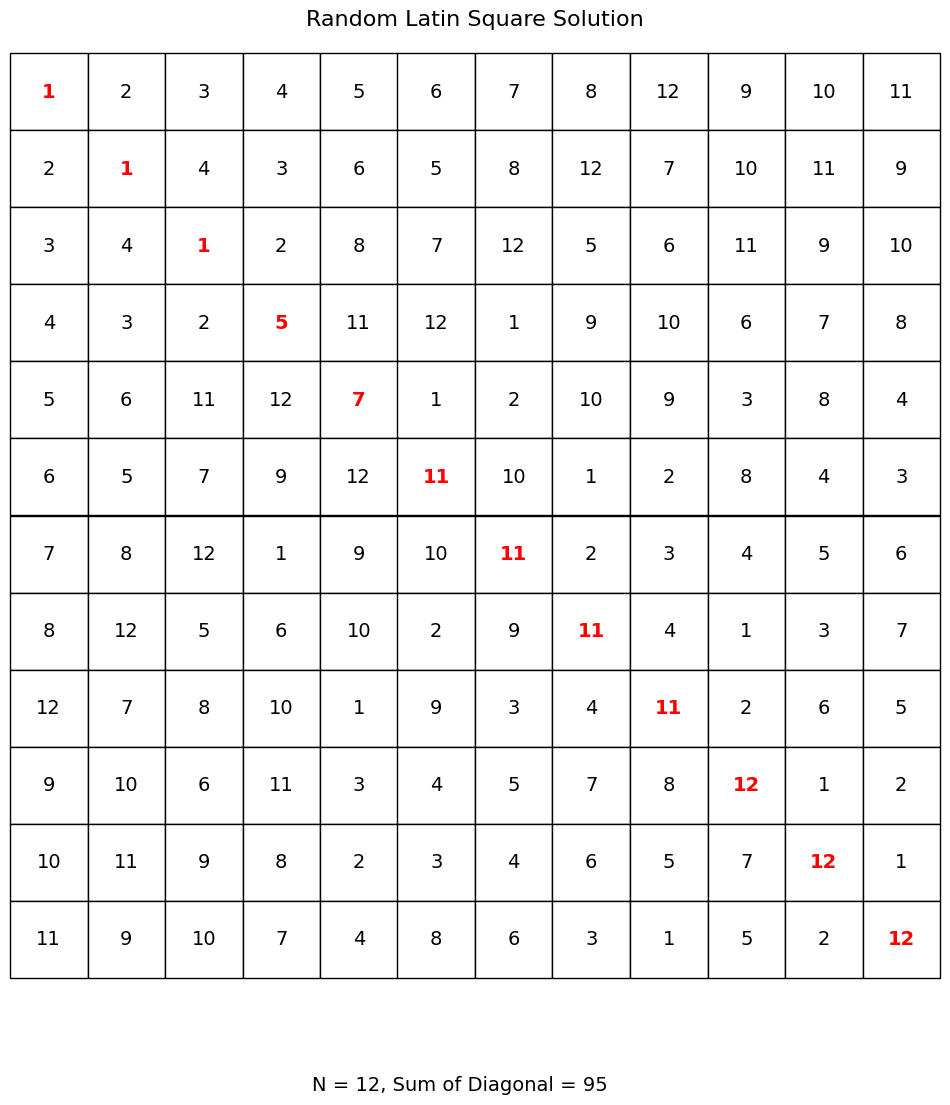

In [63]:
draw_latin_square(solutions, n)

# **Partie 2 "Calcul Scientifique"**

In [2]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np
from matplotlib import pyplot as plt

In [3]:
datasets = [
make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

## **NumPy: Régression Logistique**

### **Code**
---

In [7]:
class LogisticRegression:
    """
    Classe pour implémenter la régression logistique avec deux méthodes d'optimisation : descente de gradient et méthode de Newton.
    """
    def __init__(self, max_iterations=1000, learning_rate=0.01, optimization_method='gradient_descent'):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.weights = None
        self.bias = 0
        self.losses = []
        self.accuracies = []

    def sigmoid(self, x):
        """
        Calcule la fonction sigmoïde pour une valeur ou un tableau donné.
        """
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        """
        Entraîne le modèle en utilisant les données d'entrée X et les étiquettes y.
        La méthode d'optimisation choisie est utilisée.
        """
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        if self.optimization_method == 'gradient_descent':
            self.gradient_descent(X, y)
        elif self.optimization_method == 'Newton':
            self.Newton_method(X, y)
        else:
            raise ValueError("Méthode d'optimisation non reconnue : choisissez 'gradient_descent' ou 'Newton'.")

    def gradient_descent(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de descente de gradient.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul de l'erreur
            error = predictions - y

            # Mise à jour des poids et du biais
            gradient_w = np.dot(X.T, error) / len(y)
            gradient_b = np.sum(error) / len(y)
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def Newton_method(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de Newton.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul des gradients et de la matrice Hessienne
            gradient_w = np.dot(X.T, predictions - y) / len(y)
            gradient_b = np.sum(predictions - y) / len(y)

            diag = predictions * (1 - predictions)
            hessian = np.dot(X.T, X * diag[:, np.newaxis]) / len(y)

            # Mise à jour des poids et du biais
            self.weights -= np.linalg.solve(hessian, gradient_w)
            self.bias -= gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def predict(self, X):
        """
        Prend en entrée une ou plusieurs données et retourne les prédictions correspondantes.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)
        return (probabilities >= 0.5).astype(int)


### **Documentation : Classe Logistic Regression**
---
**<u>Description</u>** :

La classe LogisticRegression implémente la régression logistique avec deux méthodes d’optimisation : descente de gradient et méthode de Newton. Cette classe est conçue pour entraîner un modèle de classification binaire et effectuer des prédictions.

**<u>Attributs</u>** :

**<span style="color: green;">max_iterations</span>** *(int)*:

Nombre maximal d'itérations pour l'entraînement (par défaut : 1000).

**<span style="color: green;">learning_rate</span>** *(float)*:

Taux d’apprentissage utilisé dans la descente de gradient (par défaut : 0.01).

**<span style="color: green;">optimization_method</span>** *(str)*:

Méthode d'optimisation à utiliser ('gradient_descent' ou 'Newton' ; par défaut : 'gradient_descent').

**<span style="color: green;">weights</span>** *(ndarray)*:

Les poids appris après l'entraînement.

**<span style="color: green;">bias</span>** *(float)*:

Le biais appris après l'entraînement.

**<span style="color: green;">losses</span>** *(list)*:

Une liste des valeurs de la perte enregistrées au cours des itérations.

**<span style="color: green;">accuracies</span>** *(list)*:

Une liste des précisions calculées pendant les itérations (optionnel, non utilisé actuellement).

**<u>Methods</u>** :

<span style="color: blue;">__init__</span> :

Initialise le modèle de régression logistique avec des paramètres spécifiques.

- **Paramètres**
  
    - **max_iterations** *(int)*:
 
      Nombre maximal d’itérations pour l’entraînement.

    - **learning_rate** *(float)*:
 
      Taux d’apprentissage pour la descente de gradient.
  
    - **optimization_method** *(str)*:
 
      Méthode d’optimisation ('gradient_descent' ou 'Newton').
  

<span style="color: blue;">__sigmoid(self,x)__</span> :


- **Paramètres**
  
    - **x** *(float or ndarray)*:
 
      La ou les valeurs en entrée.
  
- **Retourne**

    - *(float or ndarray)*:

      Le résultat de la fonction sigmoïde

  

<span style="color: blue;">__fit(self, X, y)__</span> :

Entraîne le modèle de régression logistique avec les données fournies.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Utilise la méthode d’optimisation spécifiée.
    - Met à jour les poids et le biais du modèle.
    - Suit la perte à chaque itération.

<span style="color: blue;">__gradient_descent(self, X, y)__</span> :

Optimise les poids et le biais à l’aide de la méthode de descente de gradient.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Met à jour les poids et le biais à l’aide du gradient de la fonction de perte.
    - Enregistre la perte à chaque itération.

<span style="color: blue;">__Newton_method(self, X, y)__</span> :

Optimise les poids et le biais à l’aide de la méthode de Newton.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Calcule le gradient et la matrice Hessienne de la fonction de perte.
    - Met à jour les poids et le biais en utilisant la règle de mise à jour de Newton.
    - Enregistre la perte à chaque itération.

<span style="color: blue;">__Predict(self, X)__</span> :

Effectue des prédictions pour les données fournies en entrée.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).
  
- **Retourne**

    - *(ndarray)*:

        Les prédictions (valeurs binaires : 0 ou 1) pour chaque exemple.

### Test et évaluation sur les trois  jeux de données
---

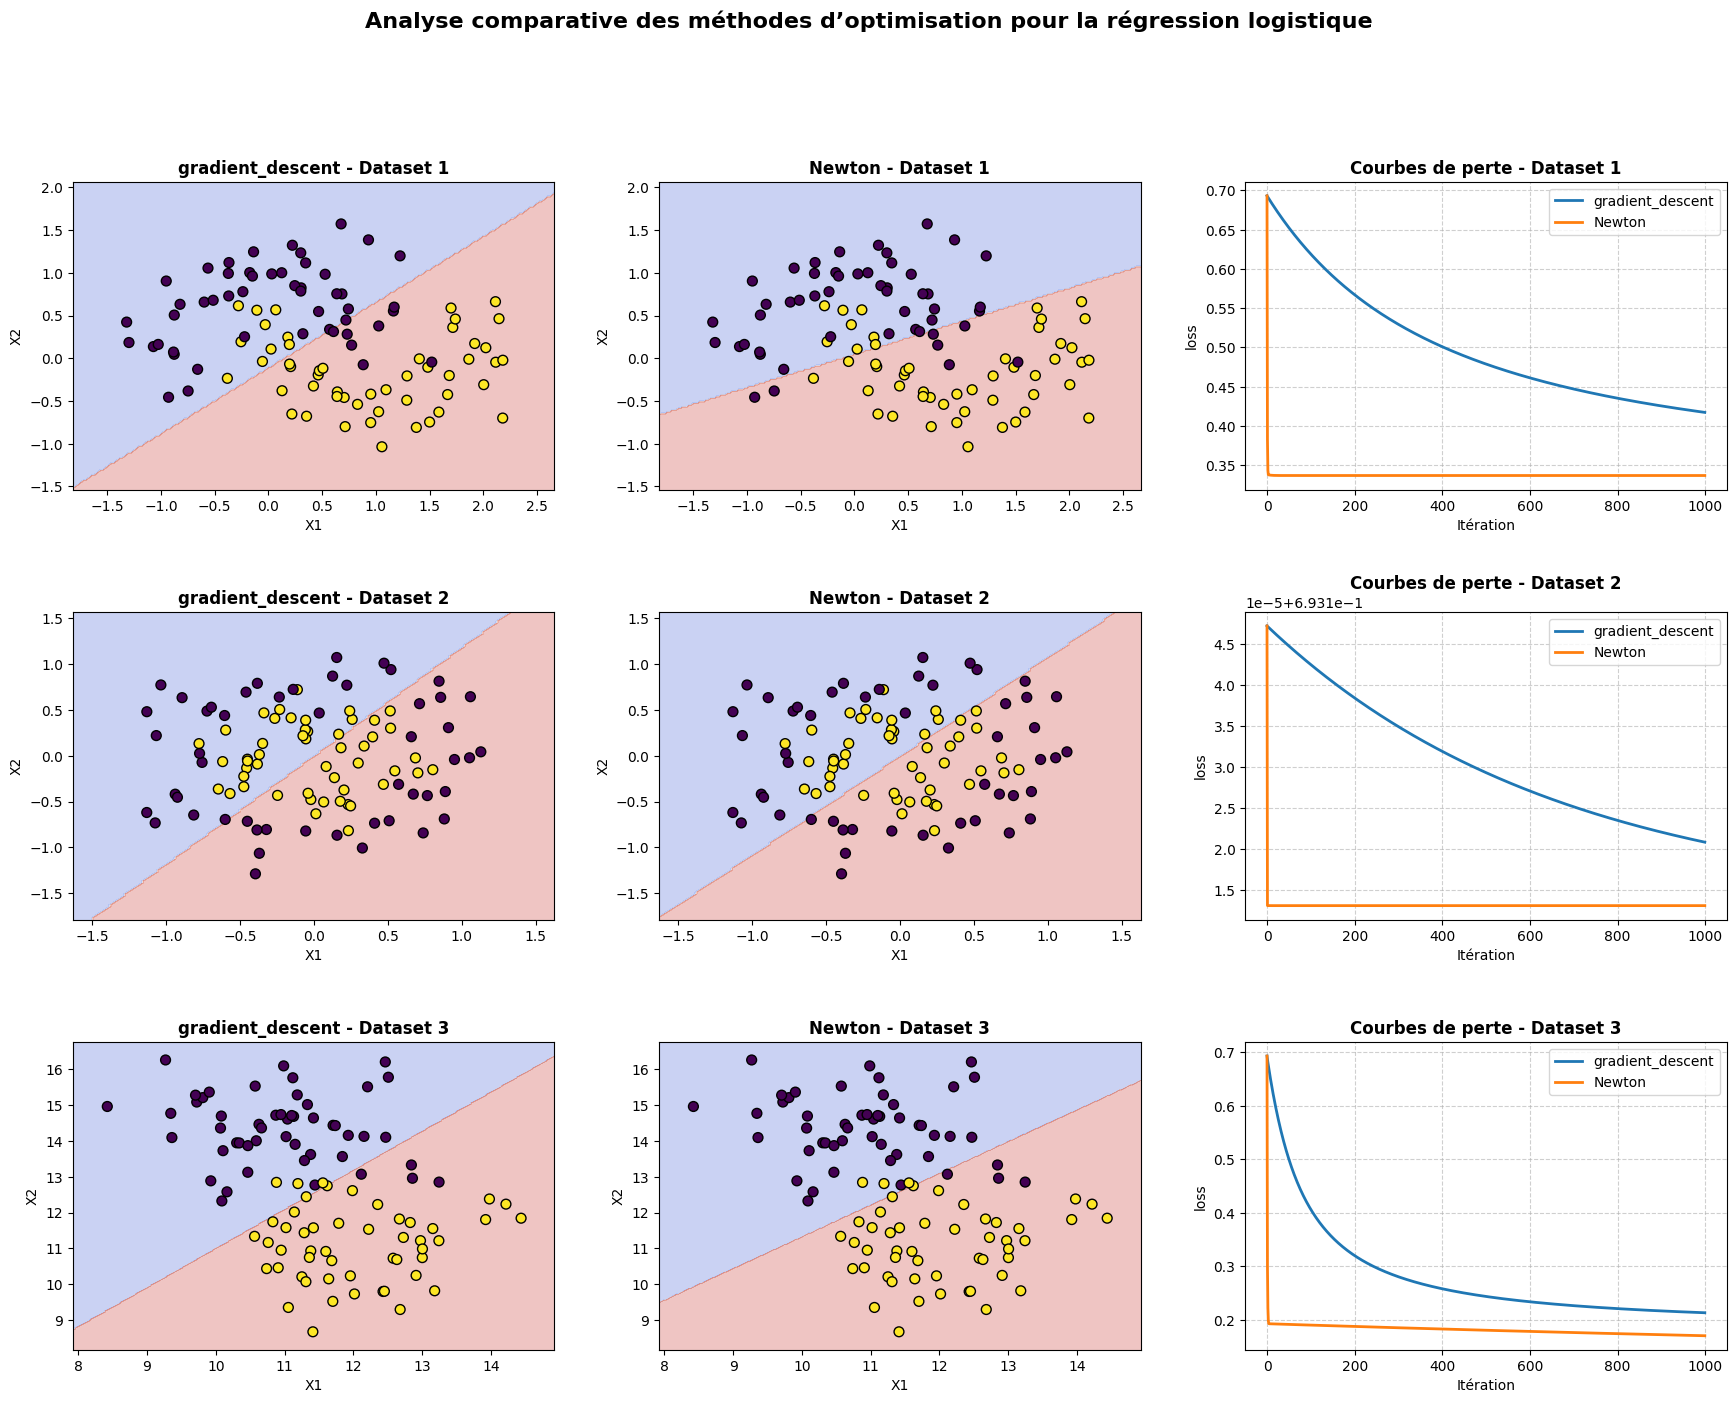

In [19]:
methods = ['gradient_descent', 'Newton']
fig, axs = plt.subplots(len(datasets), 3, figsize=(18, 15))

# Pour chaque ensemble de données
for i, data in enumerate(datasets):
    X, y = data

    # Pour chaque méthode
    for j, method in enumerate(methods):
        # Initialisation du modèle de régression logistique
        model = LogisticRegression(max_iterations=1000, optimization_method=method)
        
        # Entraînement du modèle sur les données
        model.fit(X, y)
        
        # Tracer decision boundray
        x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
        Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        
        # Visualisation 
        axs[i][j].contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
        axs[i][j].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)  
        axs[i][j].set_xlim(xx1.min(), xx1.max())
        axs[i][j].set_ylim(xx2.min(), xx2.max())
        axs[i][j].set_title(f"{method} - Dataset {i+1}", fontsize=12, fontweight='bold')
        axs[i][j].set_xlabel("X1")
        axs[i][j].set_ylabel("X2")

        # Tracer les courbes de loss
        axs[i][2].plot(model.losses, label=f'{method}', linewidth=2)
        axs[i][2].set_xlabel('Itération', fontsize=10)
        axs[i][2].set_ylabel('loss', fontsize=10)
        axs[i][2].set_title(f"Courbes de perte - Dataset {i+1}", fontsize=12, fontweight='bold')
        axs[i][2].grid(True, linestyle='--', alpha=0.6)
        axs[i][2].legend(fontsize=10)

# Ajouter un titre global pour toutes les sous-figures
fig.suptitle('Analyse comparative des méthodes d’optimisation pour la régression logistique', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=3.0)

plt.show()


**<u>Note</u>**:

- La méthode de Newton surpasse la descente de gradient : Elle converge plus rapidement et produit des frontières de décision plus précises sur tous les datasets.
- La descente de gradient est plus lente : Bien qu'elle soit efficace pour séparer les classes, elle nécessite beaucoup plus d'itérations pour converger, comme le montrent les courbes de perte.
- Complexité des datasets : Les deux méthodes fonctionnent bien, mais la méthode de Newton excelle pour des datasets avec des séparations nettes des classes grâce à sa rapidité.
- Recommandation pratique : Utilisez la méthode de Newton pour des datasets de petite ou moyenne taille nécessitant une haute précision. La descente de gradient est mieux adaptée aux grands ensembles de données avec des contraintes de calcul.

## **Arbre de décision et Foret aléatoire**

In [2]:
import numpy as np

class DecisionTree:
    def __init__(self, criterion="gini", max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None

    def gini(self, y):
        """Calcule l'indice de Gini."""
        classes, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return 1 - np.sum(p**2)

    def entropy(self, y):
        """Calcule l'entropie."""
        classes, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))

    def impurity(self, y):
        """Calcule l'impureté en fonction du critère choisi."""
        if self.criterion == "gini":
            return self.gini(y)
        elif self.criterion == "entropy":
            return self.entropy(y)
        else:
            raise ValueError("Critère non supporté : utilisez 'gini' ou 'entropy'.")

    def best_split(self, X, y):
        """Trouve la meilleure découpe des données."""
        best_feature, best_threshold, best_impurity = None, None, float("inf")
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_impurity = self.impurity(y[left_mask])
                right_impurity = self.impurity(y[right_mask])
                weighted_impurity = (np.sum(left_mask) * left_impurity +
                                     np.sum(right_mask) * right_impurity) / n_samples

                if weighted_impurity < best_impurity:
                    best_feature, best_threshold, best_impurity = feature, threshold, weighted_impurity

        return best_feature, best_threshold

    def grow_tree(self, X, y, depth=0):
        """Construit l'arbre récursivement."""
        if len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        feature, threshold = self.best_split(X, y)
        if feature is None:
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        return {
            "type": "node",
            "feature": feature,
            "threshold": threshold,
            "left": self.grow_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self.grow_tree(X[right_mask], y[right_mask], depth + 1),
        }

    def fit(self, X, y):
        """Entraîne l'arbre de décision."""
        self.tree = self.grow_tree(X, y)

    def predict_one(self, x, tree):
        """Prédit une observation individuelle."""
        if tree["type"] == "leaf":
            return tree["class"]
        if x[tree["feature"]] <= tree["threshold"]:
            return self.predict_one(x, tree["left"])
        else:
            return self.predict_one(x, tree["right"])

    def predict(self, X):
        """Prédit pour un ensemble de données."""
        return np.array([self.predict_one(x, self.tree) for x in X])

In [3]:
class RandomForest:
    def __init__(self, n_estimators=100, criterion="gini", max_depth=None):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.trees = []

    def bootstrap(self, X, y):
        """Génère un échantillon bootstrap."""
        indices = np.random.choice(len(X), size=len(X), replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        """Entraîne la forêt aléatoire."""
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap(X, y)
            tree = DecisionTree(criterion=self.criterion, max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """Prédit en votant par majorité."""
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_predictions)
        return majority_votes


Dataset 1:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.95
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.95


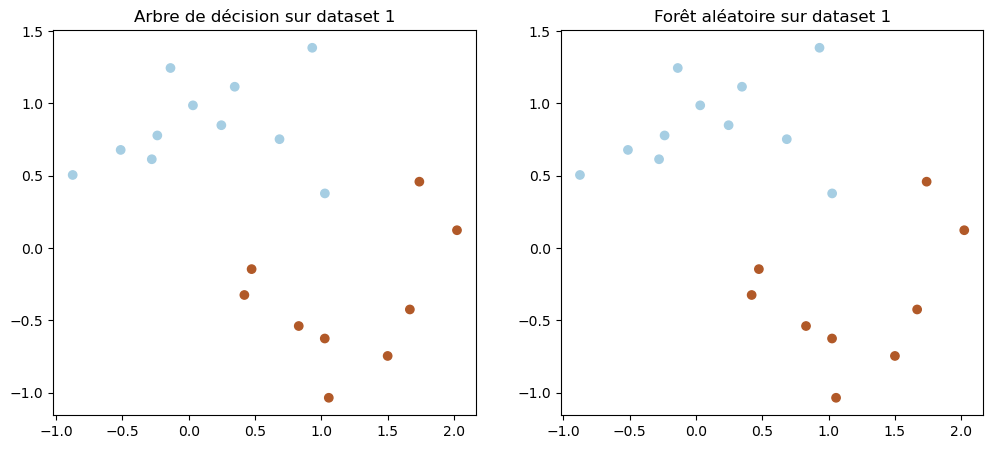

--------------------------------------------------
Dataset 2:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.80
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.80


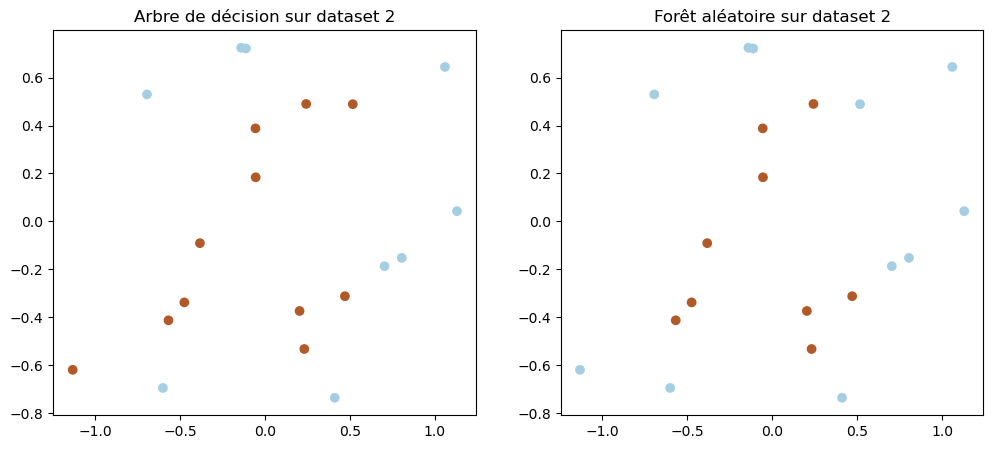

--------------------------------------------------
Dataset 3:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.90
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.90


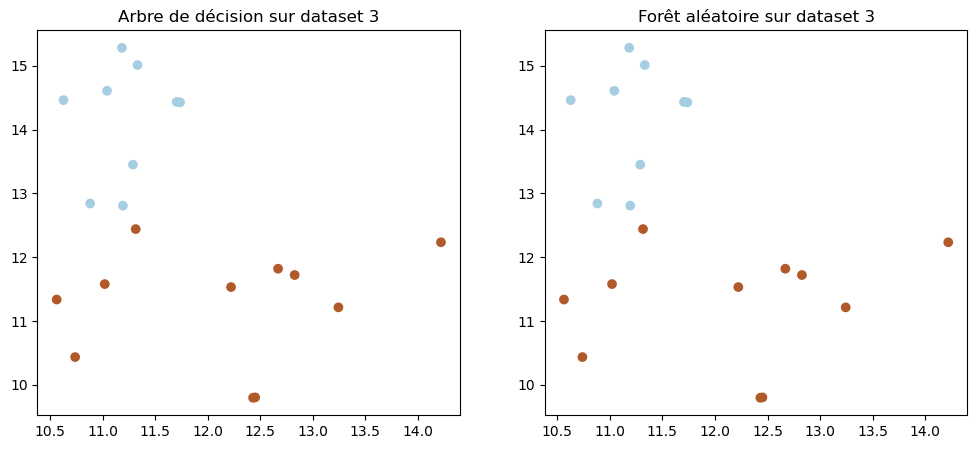

--------------------------------------------------


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Tester les modèles sur chaque dataset
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i + 1}:")

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entraînement de l'arbre de décision
    print("Entraînement de l'arbre de décision...")
    dt = DecisionTree(criterion="gini", max_depth=3)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Précision de l'arbre de décision : {accuracy_dt:.2f}")

    # Entraînement de la forêt aléatoire
    print("Entraînement de la forêt aléatoire...")
    rf = RandomForest(n_estimators=5, criterion="gini", max_depth=3)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Précision de la forêt aléatoire : {accuracy_rf:.2f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"Arbre de décision sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_dt, cmap=plt.cm.Paired)

    plt.subplot(1, 2, 2)
    plt.title(f"Forêt aléatoire sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rf, cmap=plt.cm.Paired)

    plt.show()
    print("-" * 50)

Dataset 1 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.95
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.95


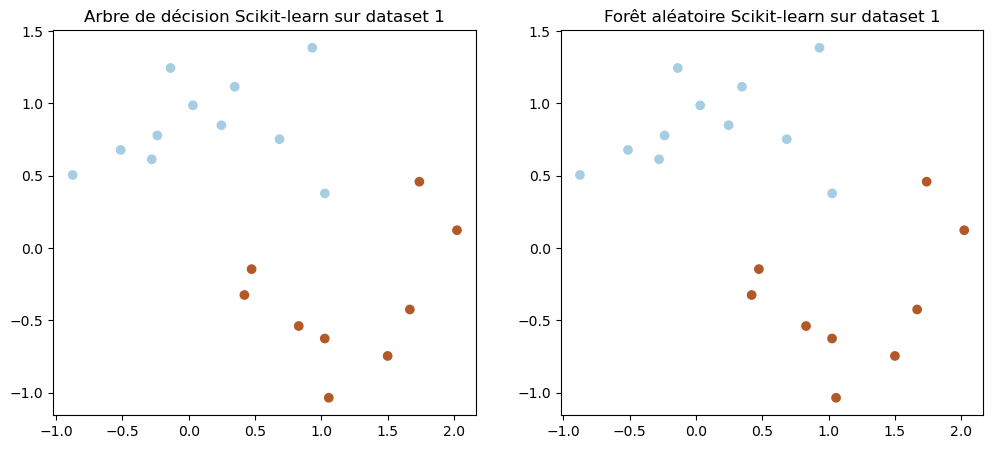

--------------------------------------------------
Dataset 2 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.75
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.75


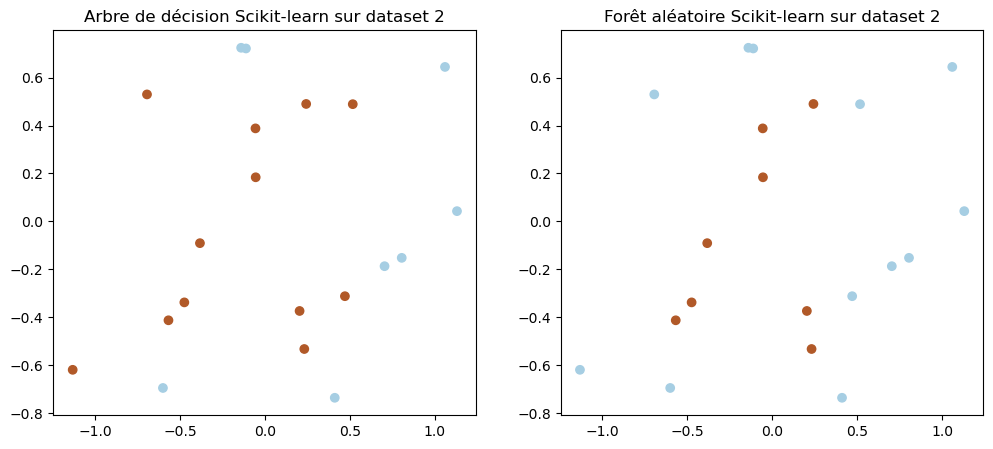

--------------------------------------------------
Dataset 3 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.90
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.95


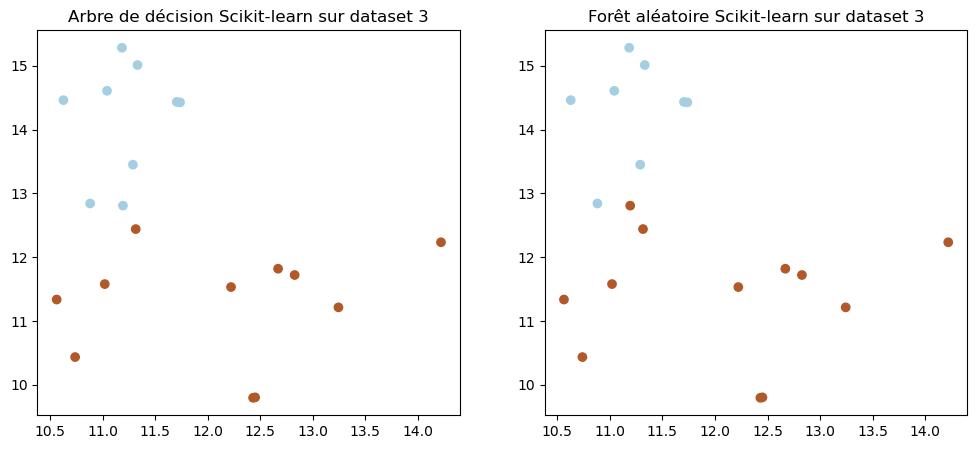

--------------------------------------------------


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Tester les modèles Scikit-learn sur chaque dataset
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i + 1} (Scikit-learn):")

    # Séparation en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Arbre de décision Scikit-learn
    print("Entraînement de l'arbre de décision...")
    sk_dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
    sk_dt.fit(X_train, y_train)
    y_pred_sk_dt = sk_dt.predict(X_test)
    accuracy_sk_dt = accuracy_score(y_test, y_pred_sk_dt)
    print(f"Précision de l'arbre de décision (Scikit-learn) : {accuracy_sk_dt:.2f}")

    # Forêt aléatoire Scikit-learn
    print("Entraînement de la forêt aléatoire...")
    sk_rf = RandomForestClassifier(n_estimators=5, criterion="gini", max_depth=3, random_state=0)
    sk_rf.fit(X_train, y_train)
    y_pred_sk_rf = sk_rf.predict(X_test)
    accuracy_sk_rf = accuracy_score(y_test, y_pred_sk_rf)
    print(f"Précision de la forêt aléatoire (Scikit-learn) : {accuracy_sk_rf:.2f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"Arbre de décision Scikit-learn sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sk_dt, cmap=plt.cm.Paired)

    plt.subplot(1, 2, 2)
    plt.title(f"Forêt aléatoire Scikit-learn sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sk_rf, cmap=plt.cm.Paired)

    plt.show()
    print("-" * 50)